In [26]:
import cv2
import numpy as np

In [27]:
image_path = 'datasets/preprocess/test/ann/00004409.png'
image = cv2.imread(image_path)

In [28]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [29]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
white_contour = max(contours, key=cv2.contourArea)

In [30]:
class_id = 0 
image_height, image_width = image.shape[:2]

In [31]:
label_file_path = 'label.txt'
with open(label_file_path, 'w') as file:
    for contour in contours:
        normalized_coordinates = []
        for point in contour:
            x_normalized = point[0][0] / image_width
            y_normalized = point[0][1] / image_height
            normalized_coordinates.extend([x_normalized, y_normalized])
        
        file.write(f'{class_id} {" ".join(map(str, normalized_coordinates))}\n')

print(f'Label file saved: {label_file_path}')

Label file saved: label.txt


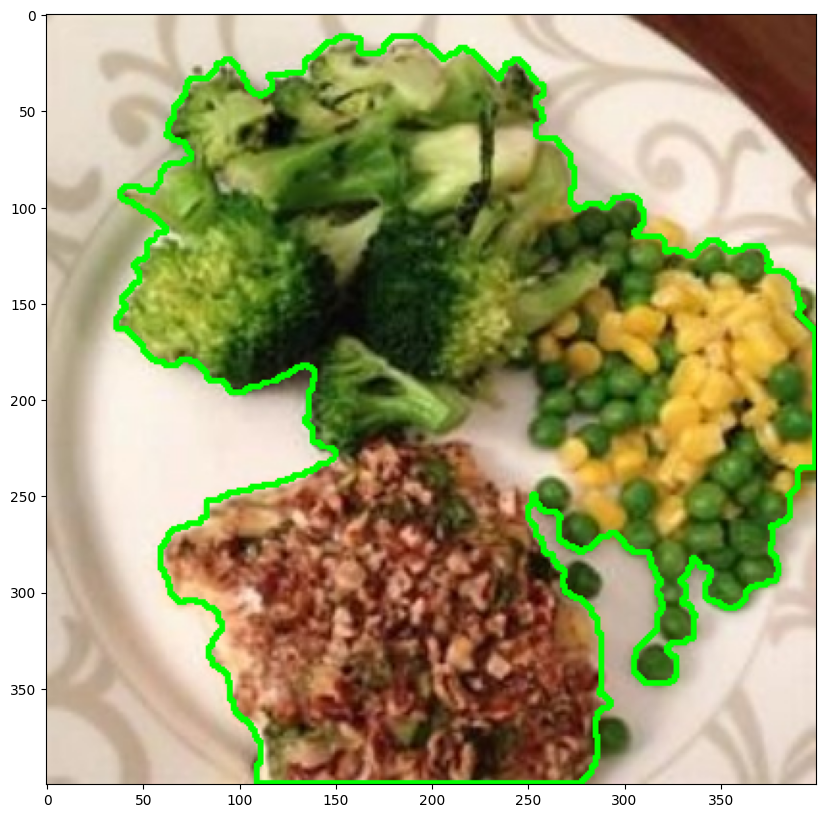

In [34]:
# use this to read label file
# and preview to image with label on it

# Path: read_label_test.ipynb
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'datasets/preprocess/test/img/00004409.jpg'
image = np.asarray(Image.open(image_path))

label_file_path = 'label.txt'
with open(label_file_path, 'r') as file:
    label = file.readline()
     
    while label:
        label = label.split()
        class_id = int(label[0])
        coordinates = list(map(float, label[1:]))
        coordinates = np.array(coordinates).reshape(-1, 2)
        coordinates = coordinates * image.shape[:2]
        coordinates = coordinates.astype(int)
        cv2.polylines(image, [coordinates], True, (0, 255, 0), 2)
        label = file.readline()
        
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()



